In [27]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [9]:
data = pd.read_csv('./df.csv', encoding='utf8')
data['path'].head()

0    ./malimg_paper_dataset_imgs/Adialer.C/000bde2e...
1    ./malimg_paper_dataset_imgs/Adialer.C/000e30a0...
2    ./malimg_paper_dataset_imgs/Adialer.C/002f06ef...
3    ./malimg_paper_dataset_imgs/Adialer.C/0044f074...
4    ./malimg_paper_dataset_imgs/Adialer.C/0046a83d...
Name: path, dtype: object

In [29]:
# CONSTANTS
IMAGE_DIMENSION = 256
IMG_SIZE = (IMAGE_DIMENSION, IMAGE_DIMENSION)

In [45]:

full_path = ''

def getImages(path):
    print(path)
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMG_SIZE)
    return np.array(image, dtype='float32')

# data['fullpath'] = './imgs/' + data['className'] + '' + data['path'].str.replace('.', '')
data['image'] = data['path'].apply(getImages)
data['image'].head()
data['ID'] = range(1, len(data) + 1)
data.head()
# data['fullpath'].head()

./malimg_paper_dataset_imgs/Adialer.C/000bde2e9a94ba41c0c111ffd80647c2.png
./malimg_paper_dataset_imgs/Adialer.C/000e30a0819ac7ed931d629ce2ef8948.png
./malimg_paper_dataset_imgs/Adialer.C/002f06eff1d222560939be72583d6ae9.png
./malimg_paper_dataset_imgs/Adialer.C/0044f0746b812f6b454ce210bc58c572.png
./malimg_paper_dataset_imgs/Adialer.C/0046a83d932a3d431eb21a99b46d6af7.png
./malimg_paper_dataset_imgs/Adialer.C/004935acac9e9afc9ffbddb20d5460d4.png
./malimg_paper_dataset_imgs/Adialer.C/008a92e720e896caea4a251e6a4c9934.png
./malimg_paper_dataset_imgs/Adialer.C/008cadcfa4ca85c4a4aaf901a70868cc.png
./malimg_paper_dataset_imgs/Adialer.C/009a2962fe18980a12e5b2d6208dc478.png
./malimg_paper_dataset_imgs/Adialer.C/00bb6b6a7be5402fcfce453630bfff19.png
./malimg_paper_dataset_imgs/Adialer.C/00c547ba11531d9357488cf1034fee3b.png
./malimg_paper_dataset_imgs/Adialer.C/00e10bb5c7467e2e52ec9505dd4c8e95.png
./malimg_paper_dataset_imgs/Adialer.C/00f505d965636db4d021f69747dd4281.png
./malimg_paper_dataset_im

className                                  file   
0  Adialer.C  000bde2e9a94ba41c0c111ffd80647c2.png  \
1  Adialer.C  000e30a0819ac7ed931d629ce2ef8948.png   
2  Adialer.C  002f06eff1d222560939be72583d6ae9.png   
3  Adialer.C  0044f0746b812f6b454ce210bc58c572.png   
4  Adialer.C  0046a83d932a3d431eb21a99b46d6af7.png   

                                                path   
0  ./malimg_paper_dataset_imgs/Adialer.C/000bde2e...  \
1  ./malimg_paper_dataset_imgs/Adialer.C/000e30a0...   
2  ./malimg_paper_dataset_imgs/Adialer.C/002f06ef...   
3  ./malimg_paper_dataset_imgs/Adialer.C/0044f074...   
4  ./malimg_paper_dataset_imgs/Adialer.C/0046a83d...   

                                            fullpath   
0  ./imgs/Adialer.C/malimg_paper_dataset_imgs/Adi...  \
1  ./imgs/Adialer.C/malimg_paper_dataset_imgs/Adi...   
2  ./imgs/Adialer.C/malimg_paper_dataset_imgs/Adi...   
3  ./imgs/Adialer.C/malimg_paper_dataset_imgs/Adi...   
4  ./imgs/Adialer.C/malimg_paper_dataset_imgs/Adi...   

                                               image  ID  
0  [[[87.0, 87.0, 87.0], [50.0, 50.0, 50.0], [3.0...   1  
1  [[[59.0, 59.0, 59.0], [50.0, 50.0, 50.0], [6.0...   2  
2  [[[58.0, 58.0, 58.0], [50.0, 50.0, 50.0], [6.0...   3  
3  [[[87.0, 87.0, 87.0], [50.0, 50.0, 50.0], [3.0...   4  
4  [[[87.0, 87.0, 87.0], [50.0, 50.0, 50.0], [3.0...   5

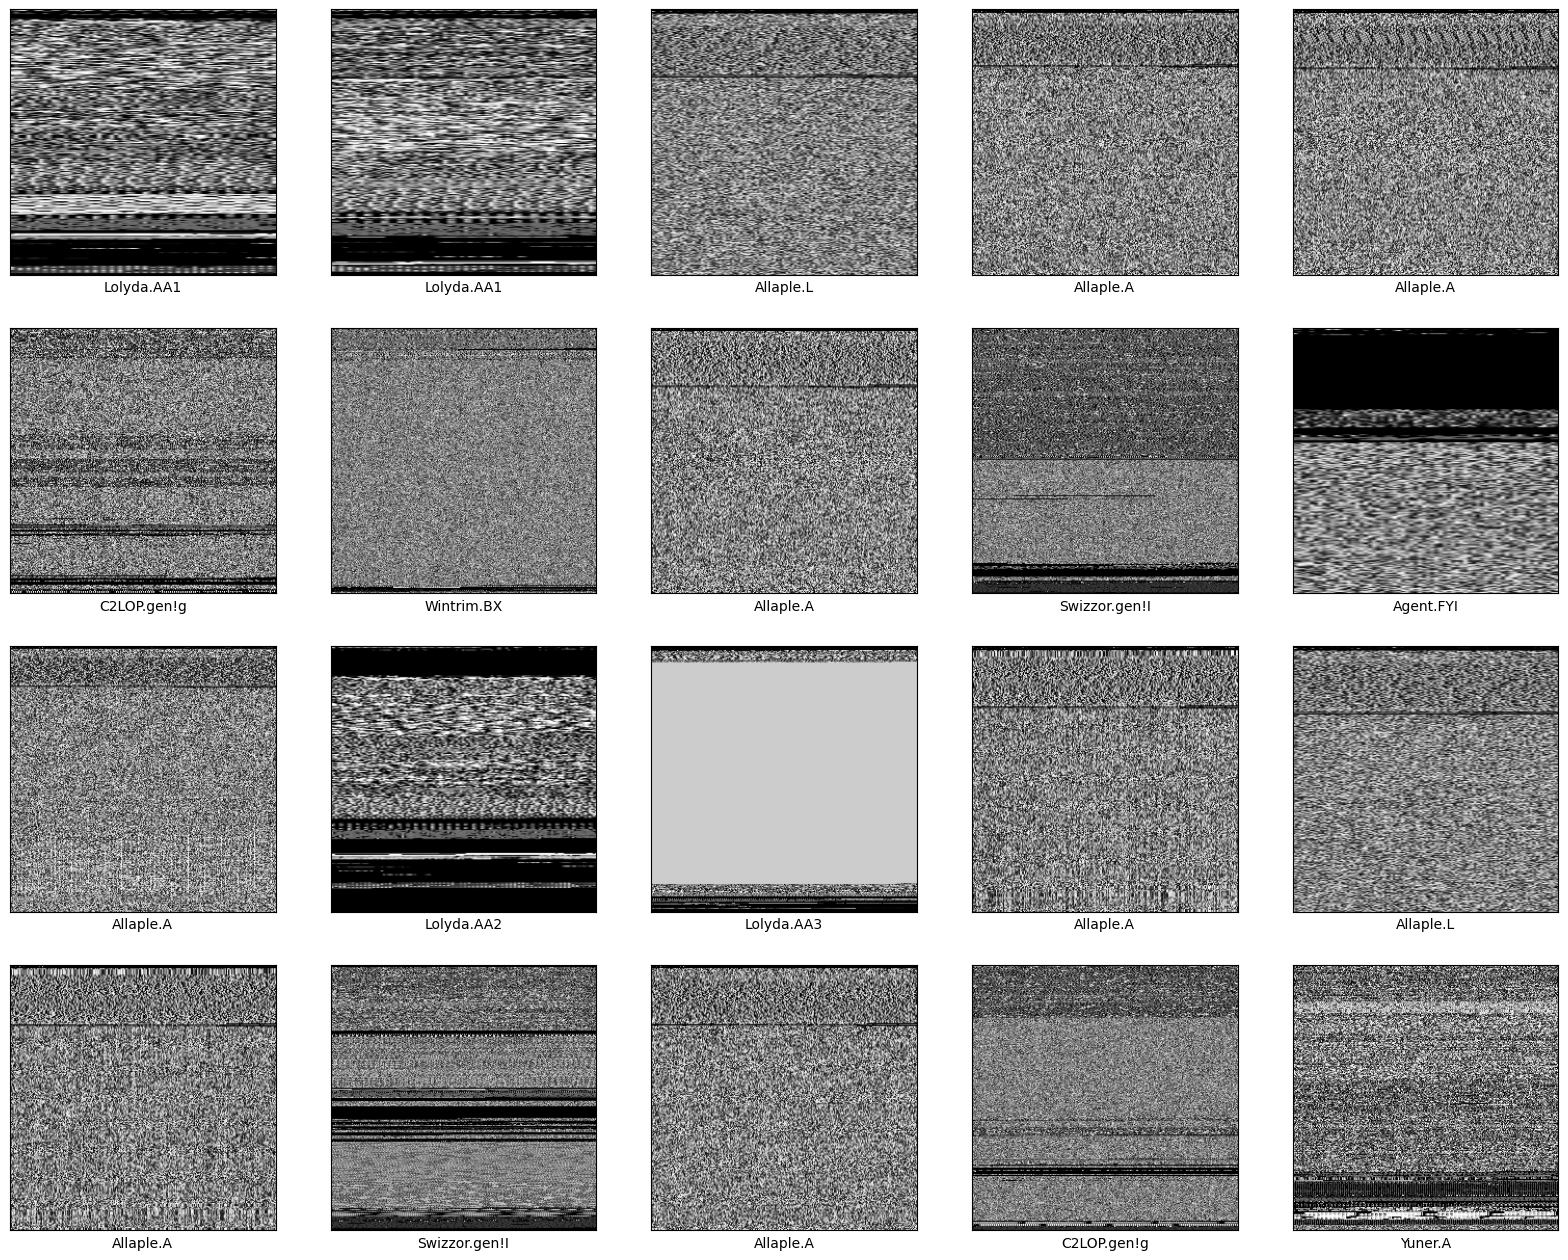

In [46]:
final_image = data.sample(20)
plt_size = (20, 20)
img = plt.figure(figsize=plt_size)
img_num = 0

for i, row in final_image.iterrows():
  plt.subplot(5, 5, img_num + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(row['image'].astype(np.uint8))
  plt.xlabel(row['className'])
  img_num += 1
plt.show()

In [33]:
data.iloc[0]

className                                            Adialer.C
file                      000bde2e9a94ba41c0c111ffd80647c2.png
path         ./malimg_paper_dataset_imgs/Adialer.C/000bde2e...
fullpath     ./imgs/Adialer.C/malimg_paper_dataset_imgs/Adi...
image        [[[87.0, 87.0, 87.0], [50.0, 50.0, 50.0], [3.0...
Name: 0, dtype: object

In [35]:
total_classes = np.unique(data.className)
number_of_total_classes = len(total_classes)
number_of_total_classes

25

In [36]:
images = []

for index, row in data.iterrows():
    images.append(row["image"].astype(float))

images =  np.array(images)

In [37]:
len(images)

9339

In [49]:
x_train = images
y_train = data.iloc[:, -1].values.astype('int32')
y = np.zeros((len(data),25))
for index, row in data.iterrows():
  y[index][row['ID']] = 1
print(len(y))

IndexError: index 25 is out of bounds for axis 0 with size 25